In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
import pqr

In [3]:
prices = pd.read_excel('factors/russia/monthlyprice.xlsx', parse_dates=True, index_col=0).astype(float)
pe = pd.read_excel('factors/russia/PE.xlsx', parse_dates=True, index_col=0).astype(float)
volume = pd.read_excel('factors/russia/betafilter.xlsx', parse_dates=True, index_col=0).astype(float)

In [4]:
prices = prices.replace(0, np.nan)
pe = pe.replace(0, np.nan)
volume = volume.replace(0, np.nan)

In [5]:
value = pqr.Factor(pe).look_back(3).hold(3)

liquidity = pqr.Factor(volume).look_back(1)
liquidity_filter = liquidity >= 10_000_000

value.filter(liquidity_filter)

In [6]:
benchmark = pqr.Benchmark().from_stock_universe(prices, liquidity_filter)

In [7]:
portfolios = pqr.fit_quantile_factor_model(prices, value, better='less')

,winners,p2,losers
"Total Return, %",1310.59,302.13,439.81
"CAGR, %",16.76,8.49,10.37
"Volatility, %",26.42,28.42,27.11
"Win Rate, %",59.51,59.02,56.59
"Maximum Drawdown, %",-66.77,-77.39,-74.19
"VaR, %",-32.45,-41.29,-37.02
"Expected Tail Loss, %",-52.17,-65.23,-56.93
Rachev Ratio,1.27,0.91,1.14
Calmar Ratio,0.25,0.11,0.14
Sharpe Ratio,0.72,0.44,0.5


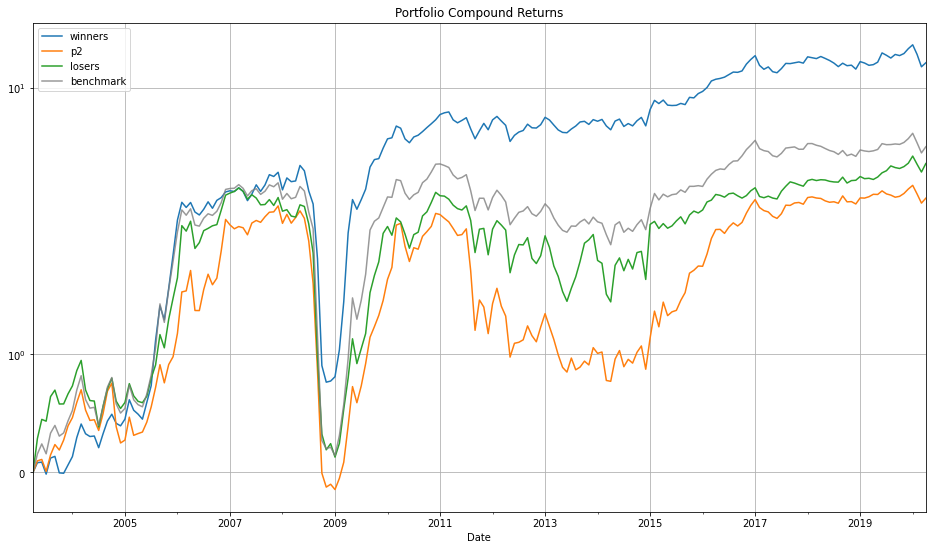

In [8]:
pqr.summary_tear_sheet(portfolios, benchmark)